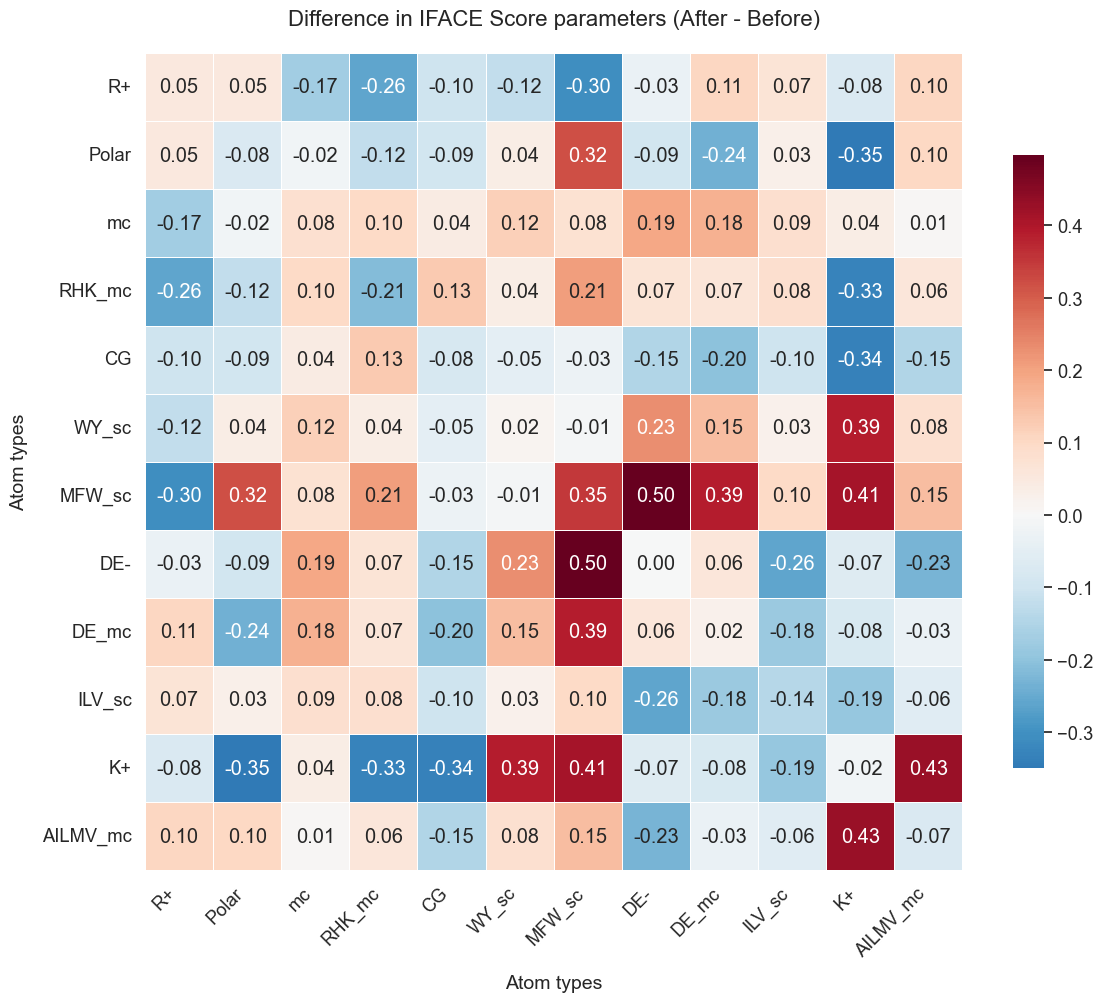

              R+      Polar         mc     RHK_mc         CG      WY_sc  \
count  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000   
mean   -0.057417  -0.037333   0.059583  -0.014667  -0.093750   0.076000   
std     0.140379   0.170013   0.095697   0.172052   0.118111   0.134952   
min    -0.304000  -0.350000  -0.172000  -0.330000  -0.335000  -0.121000   
25%    -0.133750  -0.101000   0.027500  -0.144500  -0.150250   0.010000   
50%    -0.056000  -0.048000   0.076500   0.061000  -0.098500   0.038500   
75%     0.057250   0.041750   0.103250   0.087500  -0.042500   0.128000   
max     0.106000   0.320000   0.190000   0.208000   0.132000   0.389000   

          MFW_sc        DE-      DE_mc     ILV_sc         K+   AILMV_mc  
count  12.000000  12.000000  12.000000  12.000000  12.000000  12.000000  
mean    0.180000   0.017417   0.019833  -0.045667  -0.015500   0.032083  
std     0.229384   0.212498   0.180983   0.127332   0.286063   0.167663  
min    -0.304000  -0.260000 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# グループの順序を定義
groups = ["R+", "Polar", "mc", "RHK_mc", "CG", "WY_sc", "MFW_sc", "DE-", "DE_mc", "ILV_sc", "K+", "AILMV_mc"]

# CSVファイルの読み込み（ヘッダーとインデックスを指定）
before = pd.read_csv('iface_before.csv', header=None, names=groups)
before.index = groups
after = pd.read_csv('iface_after.csv', header=None, names=groups)
after.index = groups

# データの型を確認し、必要に応じて数値型に変換
before = before.apply(pd.to_numeric, errors='coerce')
after = after.apply(pd.to_numeric, errors='coerce')

# 差分の計算
diff = after - before

# プロットの設定
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)

# ヒートマップの作成
heatmap = sns.heatmap(diff, cmap='RdBu_r', center=0, annot=True, fmt='.2f', 
                      square=True, linewidths=.5, cbar_kws={"shrink": .75})

# タイトルと軸ラベルの設定
plt.title('Difference in IFACE Score parameters (After - Before)', fontsize=16, pad=20)
plt.xlabel('Atom types', fontsize=14, labelpad=10)
plt.ylabel('Atom types', fontsize=14, labelpad=10)

# 軸ラベルの回転
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# レイアウトの調整と保存
plt.tight_layout()
plt.savefig('iface_score_difference_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# データの要約統計を表示（デバッグ用）
print(diff.describe())
print("\nNaN values in diff:")
print(diff.isna().sum())

In [2]:
before

,R+,Polar,mc,RHK_mc,CG,WY_sc,MFW_sc,DE-,DE_mc,ILV_sc,K+,AILMV_mc
R+,0.678,0.133,-0.007,0.727,0.091,-0.742,-0.625,-0.064,-0.382,-0.302,1.221,0.187
Polar,0.133,0.180,0.065,0.295,0.057,-0.631,-0.663,0.612,0.342,-0.275,0.604,0.248
mc,-0.007,0.065,-0.145,0.093,-0.265,-1.078,-1.176,0.636,0.355,-0.552,0.483,0.109
RHK_mc,0.727,0.295,0.093,0.696,-0.016,-0.735,-0.804,0.525,0.144,-0.202,1.116,0.477
CG,0.091,0.057,-0.265,-0.016,-0.601,-0.928,-1.046,0.644,0.615,-0.573,0.062,-0.034
WY_sc,-0.742,-0.631,-1.078,-0.735,-0.928,-0.914,-1.696,-0.577,-0.430,-1.495,-0.303,-0.867
MFW_sc,-0.625,-0.663,-1.176,-0.804,-1.046,-1.696,-1.938,-0.214,0.015,-1.771,0.092,-1.040
DE-,-0.064,0.612,0.636,0.525,0.644,-0.577,-0.214,1.620,1.233,-0.001,0.368,0.822
DE_mc,-0.382,0.342,0.355,0.144,0.615,-0.430,0.015,1.233,1.090,0.050,-0.024,0.757
ILV_sc,-0.302,-0.275,-0.552,-0.202,-0.573,-1.495,-1.771,-0.001,0.050,-1.606,0.253,-0.572


In [3]:
after

,R+,Polar,mc,RHK_mc,CG,WY_sc,MFW_sc,DE-,DE_mc,ILV_sc,K+,AILMV_mc
R+,0.731,0.186,-0.179,0.465,-0.014,-0.863,-0.929,-0.098,-0.276,-0.232,1.143,0.292
Polar,0.186,0.103,0.046,0.173,-0.037,-0.593,-0.343,0.518,0.107,-0.246,0.254,0.351
mc,-0.179,0.046,-0.068,0.191,-0.222,-0.959,-1.100,0.826,0.532,-0.466,0.518,0.114
RHK_mc,0.465,0.173,0.191,0.484,0.116,-0.696,-0.596,0.592,0.209,-0.118,0.786,0.534
CG,-0.014,-0.037,-0.222,0.116,-0.685,-0.976,-1.072,0.493,0.411,-0.676,-0.273,-0.184
WY_sc,-0.863,-0.593,-0.959,-0.696,-0.976,-0.897,-1.707,-0.347,-0.275,-1.469,0.086,-0.788
MFW_sc,-0.929,-0.343,-1.100,-0.596,-1.072,-1.707,-1.588,0.283,0.405,-1.673,0.503,-0.889
DE-,-0.098,0.518,0.826,0.592,0.493,-0.347,0.283,1.620,1.290,-0.261,0.303,0.594
DE_mc,-0.276,0.107,0.532,0.209,0.411,-0.275,0.405,1.290,1.114,-0.134,-0.105,0.725
ILV_sc,-0.232,-0.246,-0.466,-0.118,-0.676,-1.469,-1.673,-0.261,-0.134,-1.746,0.059,-0.632


In [4]:
before + diff

,R+,Polar,mc,RHK_mc,CG,WY_sc,MFW_sc,DE-,DE_mc,ILV_sc,K+,AILMV_mc
R+,0.731,0.186,-0.179,0.465,-0.014,-0.863,-0.929,-0.098,-0.276,-0.232,1.143,0.292
Polar,0.186,0.103,0.046,0.173,-0.037,-0.593,-0.343,0.518,0.107,-0.246,0.254,0.351
mc,-0.179,0.046,-0.068,0.191,-0.222,-0.959,-1.100,0.826,0.532,-0.466,0.518,0.114
RHK_mc,0.465,0.173,0.191,0.484,0.116,-0.696,-0.596,0.592,0.209,-0.118,0.786,0.534
CG,-0.014,-0.037,-0.222,0.116,-0.685,-0.976,-1.072,0.493,0.411,-0.676,-0.273,-0.184
WY_sc,-0.863,-0.593,-0.959,-0.696,-0.976,-0.897,-1.707,-0.347,-0.275,-1.469,0.086,-0.788
MFW_sc,-0.929,-0.343,-1.100,-0.596,-1.072,-1.707,-1.588,0.283,0.405,-1.673,0.503,-0.889
DE-,-0.098,0.518,0.826,0.592,0.493,-0.347,0.283,1.620,1.290,-0.261,0.303,0.594
DE_mc,-0.276,0.107,0.532,0.209,0.411,-0.275,0.405,1.290,1.114,-0.134,-0.105,0.725
ILV_sc,-0.232,-0.246,-0.466,-0.118,-0.676,-1.469,-1.673,-0.261,-0.134,-1.746,0.059,-0.632


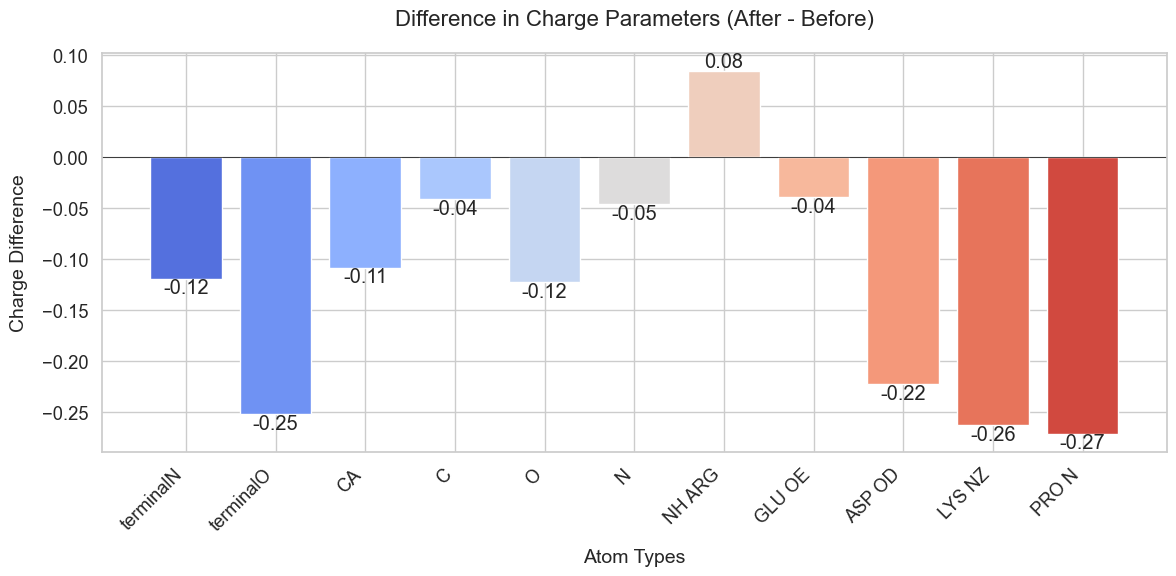

          charge
count  11.000000
mean   -0.127167
std     0.114082
min    -0.270782
25%    -0.236918
50%    -0.118914
75%    -0.043713
max     0.084041

Charge differences:
             charge
terminalN -0.118914
terminalO -0.251612
CA        -0.108301
C         -0.041327
O         -0.122460
N         -0.046099
NH ARG     0.084041
GLU OE    -0.038982
ASP OD    -0.222224
LYS NZ    -0.262173
PRO N     -0.270782


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# atom typeのラベルを定義
atom_types = ["terminalN", "terminalO", "CA", "C", "O", "N", "NH ARG", "GLU OE", "ASP OD", "LYS NZ", "PRO N"]
# CSVファイルの読み込み
charge_before = pd.read_csv('charge_before.csv', header=None, names=['charge'])
charge_after = pd.read_csv('charge_after.csv', header=None, names=['charge'])

# インデックスを設定
charge_before.index = atom_types
charge_after.index = atom_types

# 差分の計算
charge_diff = charge_after - charge_before

# プロットの設定
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# 棒グラフの作成
bars = plt.bar(charge_diff.index, charge_diff['charge'], color=sns.color_palette("coolwarm", len(atom_types)))

# バーの上に値を表示
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom' if height > 0 else 'top')

# タイトルと軸ラベルの設定
plt.title('Difference in Charge Parameters (After - Before)', fontsize=16, pad=20)
plt.xlabel('Atom Types', fontsize=14, labelpad=10)
plt.ylabel('Charge Difference', fontsize=14, labelpad=10)

# x軸のラベルを回転
plt.xticks(rotation=45, ha='right')

# y軸に0の線を追加
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# レイアウトの調整と保存
plt.tight_layout()
plt.savefig('charge_difference_bar_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# データの要約統計を表示（デバッグ用）
print(charge_diff.describe())
print("\nCharge differences:")
print(charge_diff)

<IPython.core.display.Javascript object>


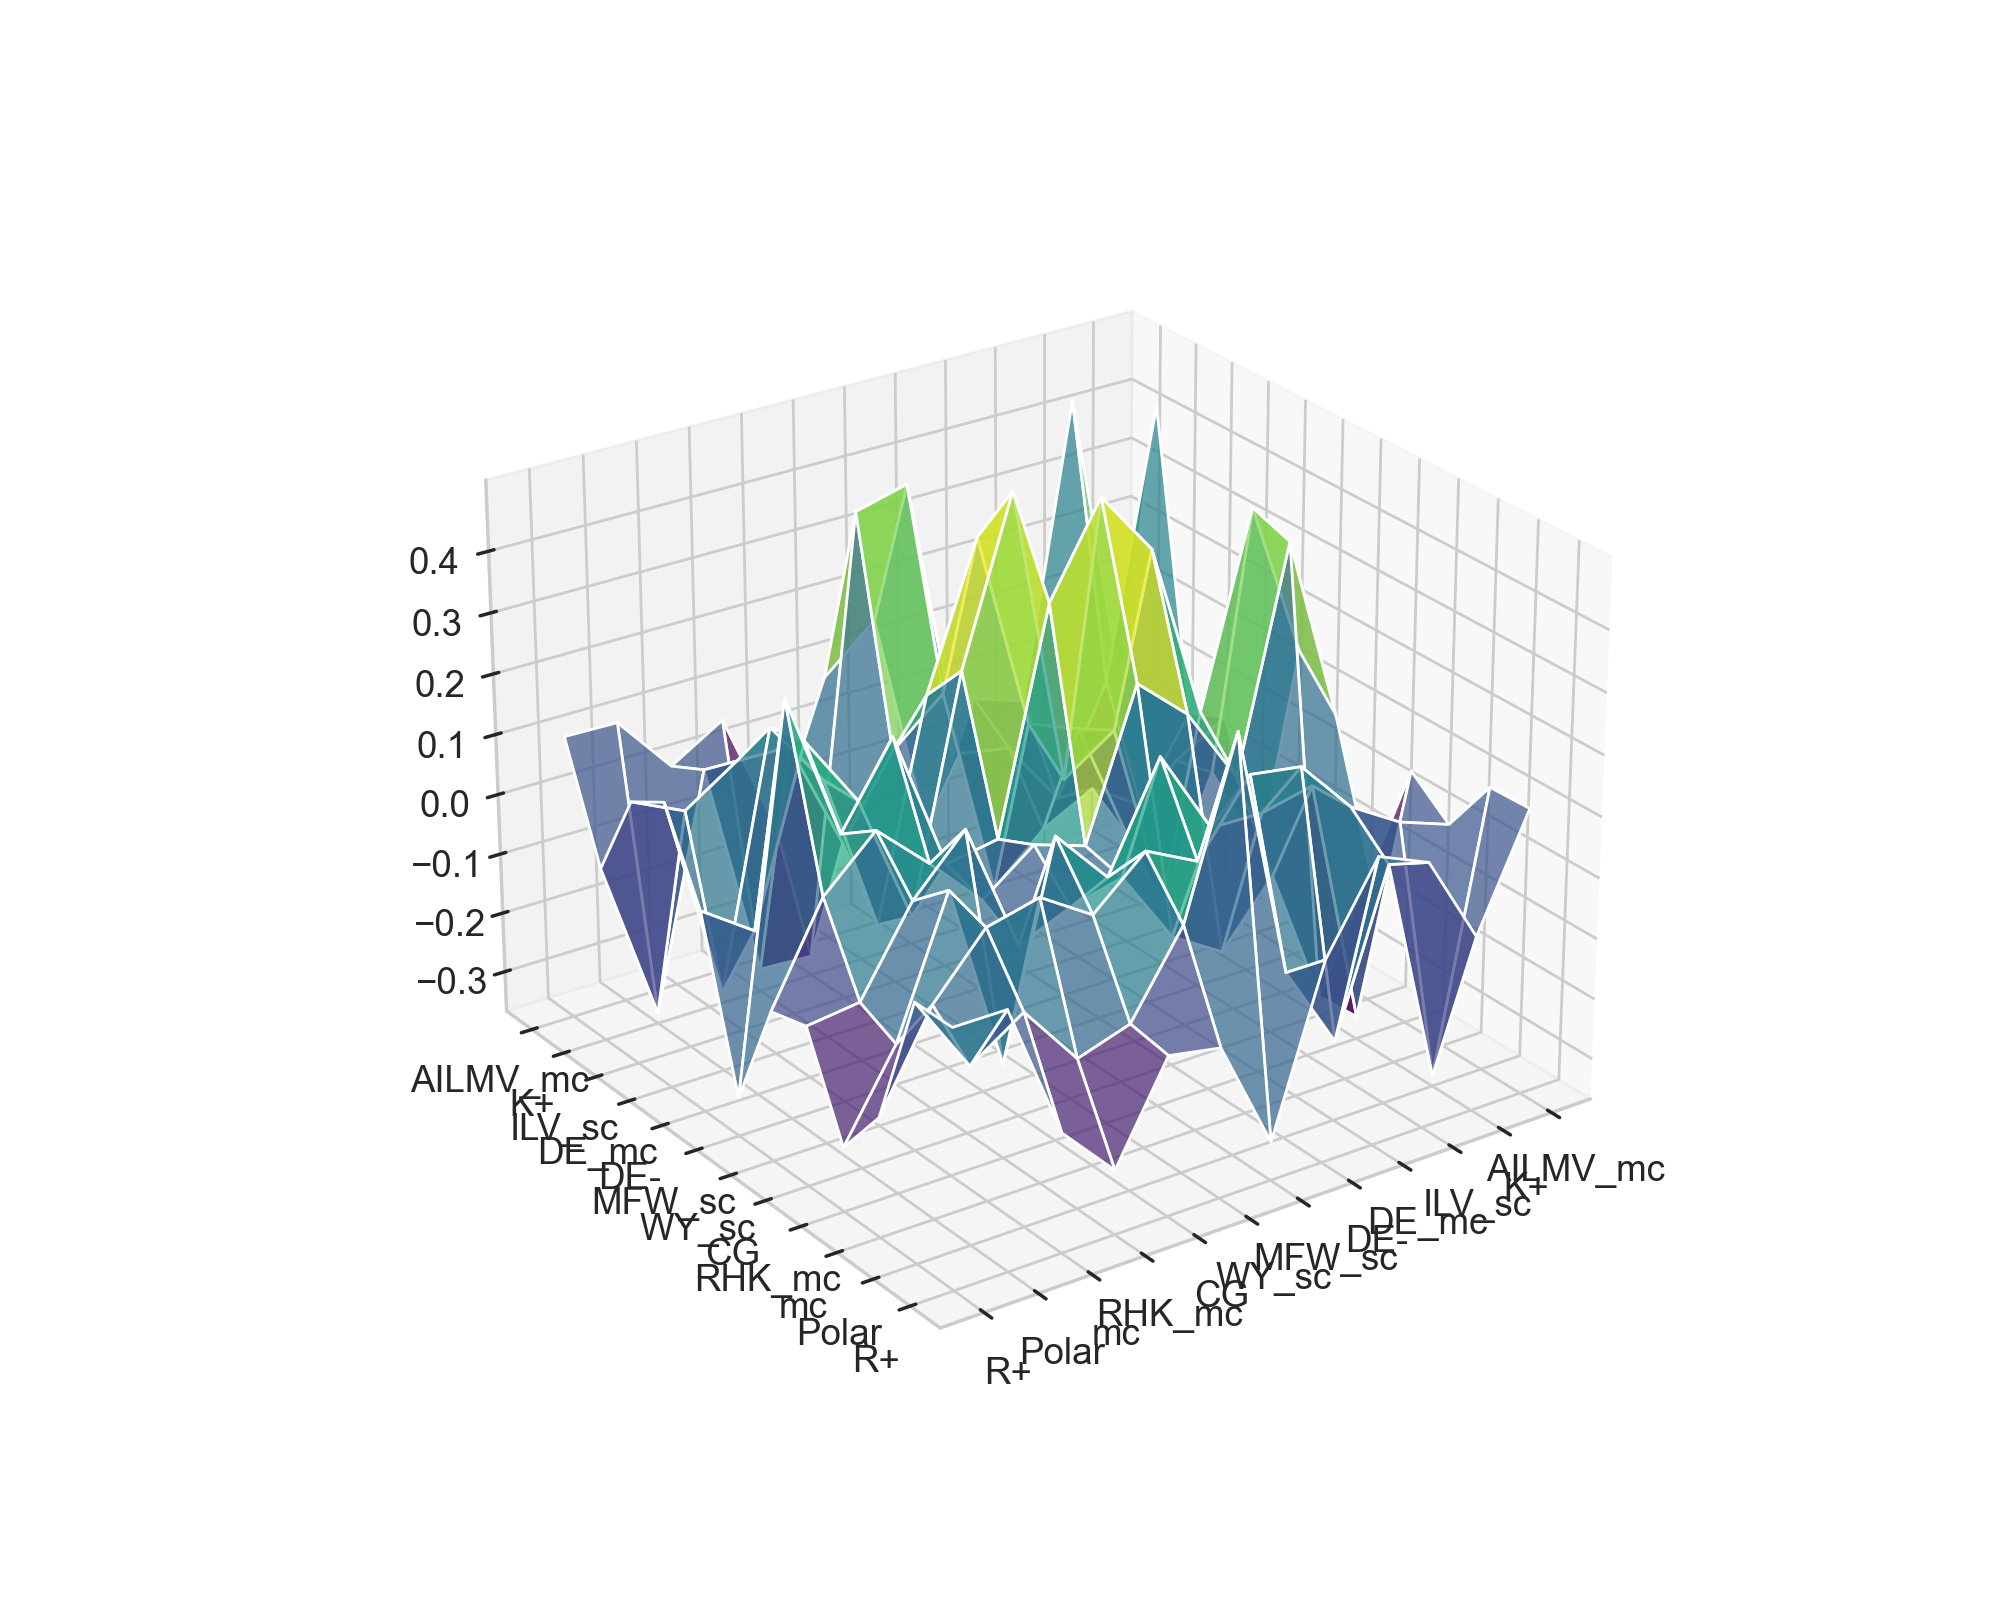

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib notebook

# 二次元配列のサイズ
size = 12

# グリッドを生成
X = np.arange(size)
Y = np.arange(size)
X, Y = np.meshgrid(X, Y)

# Z軸の値を計算（ここではサンプルとしてsinを使用）
Z = np.sin(np.sqrt(X**2 + Y**2))

# プロットを作成
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 三次元プロット
ax.plot_surface(X, Y, diff, cmap='viridis', alpha=0.7)

# # Z = "F" の平面を追加 (Fは6番目のアルファベットでZ=5に対応)
# Z_plane = 0
# X_plane, Y_plane = np.meshgrid(np.arange(size+1), np.arange(size+1))
# Z_plane_values = np.full(X_plane.shape, Z_plane)

# # 平面をプロット
# ax.plot_surface(X_plane, Y_plane, Z_plane_values, color='red', alpha=0.5)


# グループの順序を定義
groups = ["R+", "Polar", "mc", "RHK_mc", "CG", "WY_sc", "MFW_sc", "DE-", "DE_mc", "ILV_sc", "K+", "AILMV_mc"]

# X, Y軸にラベルを設定
ax.set_xticks(np.arange(size))
ax.set_xticklabels(groups[:size])
ax.set_yticks(np.arange(size))
ax.set_yticklabels(groups[:size])

# # Z軸にAからLのラベルを設定（Zの値の数が足りないため、循環させる）
# ax.set_zticks(np.linspace(np.min(Z), np.max(Z), len(groups)))
# ax.set_zticklabels(groups[:len(labels)])

plt.ion()

# プロットを表示
plt.show()
